In [1]:
import sys
import datetime as dt
import pandas as pd
import numpy as np
import h5py
import dask.dataframe as dd
import dask.array as da

import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('../')
from envir import config

In [2]:
# read in datasets
spl = pd.read_csv(config.dataFol+'clean_spl/clean_spl.csv')
spl['sonyc_sensor_id'] = spl['sonyc_sensor_id'].str[10:22]
nexrad = pd.read_csv(config.dataFol+'clean_nexrad/clean_nexrad.csv')
yamnet = pd.read_csv(config.dataFol+'clean_yamnet/clean_yamnet.csv',
                     names = ['sonyc_sensor_id', 'timestamp', 'count_of_predictions_over_50', 'average_prediction'])

In [3]:
spl.head()

,sonyc_sensor_id,sonyc_sensor_name,timestamp,year,month,day,hour,minute,dBAS_lin_mean,dBAS_mean,dBAS_max
0,b827eb905497,Kimmel Center,2017-01-04 02:17,2017,1,4,2,17,67.65112,66.045130,76.51
1,b827eb905497,Kimmel Center,2017-01-04 02:18,2017,1,4,2,18,66.96185,64.713500,77.19
2,b827eb905497,Kimmel Center,2017-01-04 02:19,2017,1,4,2,19,64.16872,62.833530,72.68
3,b827eb905497,Kimmel Center,2017-01-04 02:20,2017,1,4,2,20,60.71768,60.404675,65.08
4,b827eb905497,Kimmel Center,2017-01-04 02:21,2017,1,4,2,21,63.59528,62.724770,72.16


In [4]:
nexrad.head()

,radar_name,timestamp,mtr,mt,height,airspeed,heading,airspeed_u,airspeed_v
0,KOKX,2016-01-01 00:01,2.404765,0.196389,246.073922,2.245836,250.508740,-2.125352,-0.460421
1,KOKX,2016-01-01 00:11,2.401061,0.587562,229.731845,1.218308,23.347845,-0.425245,0.419093
2,KOKX,2016-01-01 00:20,2.922019,1.064014,234.408898,1.776066,145.565965,-1.650339,-0.415139
3,KOKX,2016-01-01 00:30,2.694789,1.503040,258.924413,1.568954,25.209671,-0.858024,0.372199
4,KOKX,2016-01-01 00:40,3.106677,2.008306,245.842580,1.155723,-5.553182,-0.887278,0.142879


In [5]:
yamnet.head()

,sonyc_sensor_id,timestamp,count_of_predictions_over_50,average_prediction
0,b827eb815321,2017-02-26 06:32,1,0.694439
1,b827eb815321,2017-02-26 06:38,1,0.663563
2,b827eb815321,2017-02-26 06:48,6,0.670553
3,b827eb815321,2017-02-26 06:51,4,0.723974
4,b827eb815321,2017-02-26 06:52,2,0.622770


In [6]:
# create a timestamp index
df = pd.DataFrame({'timestamp': pd.date_range(start="2017-01-01", end="2020-05-31", freq='T')})
df['month'] = pd.DatetimeIndex(df['timestamp']).month
df = df[(df.month >=3) & (df.month <= 5)].reset_index()
df.drop(columns = ['index', 'month'], inplace=True)
df['timestamp'] = df['timestamp'].astype('str').str[0:16]

In [7]:
df = df.merge(spl, how='left', on='timestamp')
df = df.merge(yamnet, how='left', on=['timestamp', 'sonyc_sensor_id'])
df = df.merge(nexrad, how='left', on='timestamp')

In [8]:
df.shape

(1571796, 21)

In [9]:
df.columns

Index(['timestamp', 'sonyc_sensor_id', 'sonyc_sensor_name', 'year', 'month',
       'day', 'hour', 'minute', 'dBAS_lin_mean', 'dBAS_mean', 'dBAS_max',
       'count_of_predictions_over_50', 'average_prediction', 'radar_name',
       'mtr', 'mt', 'height', 'airspeed', 'heading', 'airspeed_u',
       'airspeed_v'],
      dtype='object')

/home/cusp/yg833/.conda/envs/birdsVE3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/cusp/yg833/.conda/envs/birdsVE3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


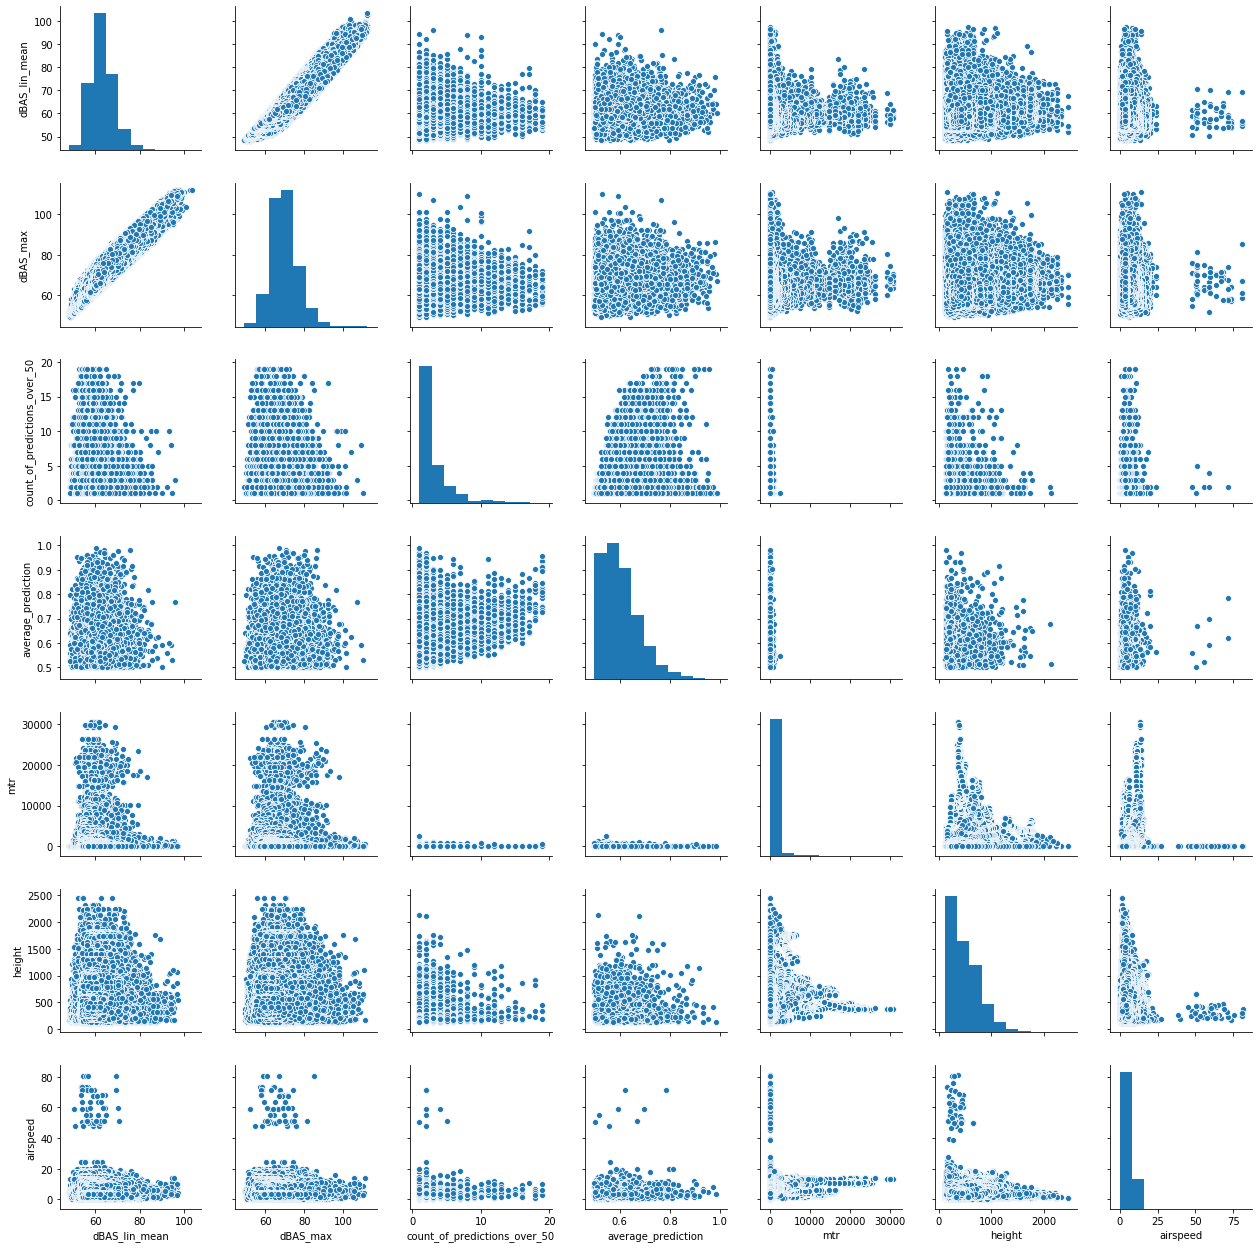

In [15]:
import seaborn as sns
sns.pairplot(df[['sonyc_sensor_name', 'dBAS_lin_mean', 'dBAS_max','count_of_predictions_over_50',
                 'average_prediction','mtr', 'height', 'airspeed']])